In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\H.P\Downloads\DiwaliSalesData.csv",encoding="unicode_escape")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [9]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.drop(columns=["Status","unnamed1"],inplace = True)


In [ ]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

<Axes: ylabel='Amount'>

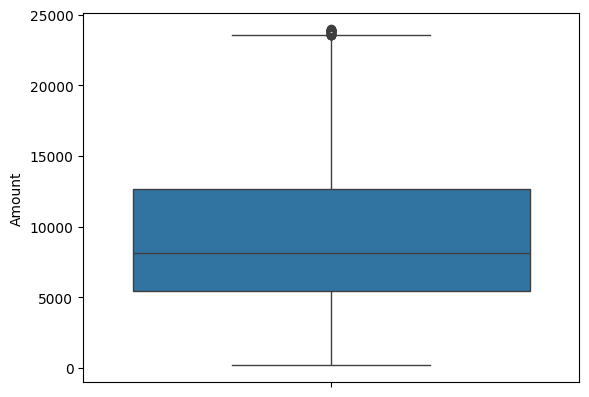

In [13]:
sns.boxplot(df.Amount)

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [18]:
df.Product_ID.unique()

array(['P00125942', 'P00110942', 'P00118542', ..., 'P00307142',
       'P00044742', 'P00296942'], shape=(2351,), dtype=object)

In [17]:
sns.countplot(df.Product_ID)

<Axes: xlabel='count', ylabel='Product_ID'>

Error in callback <function flush_figures at 0x0000016ED99C31A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [146]:
d = df.Product_ID.value_counts().to_dict()

In [147]:
temp={}
for i in d:
    if d[i]>=25:
        temp[i]=d[i]
        
    else:
        break

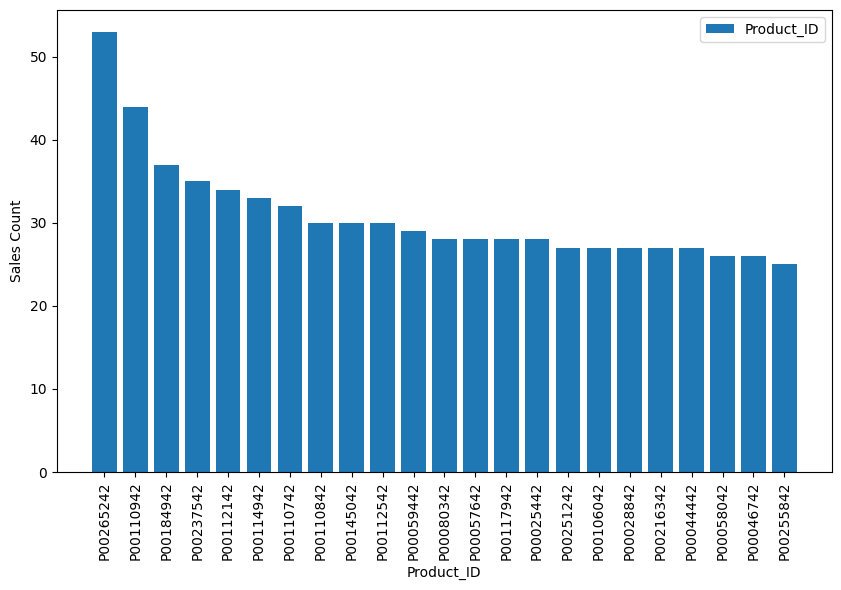

In [148]:
plt.figure(figsize=(10,6))
plt.bar(temp.keys(),temp.values(),label="Product_ID")
plt.xticks(rotation=90)
plt.xlabel("Product_ID")
plt.ylabel("Sales Count")
plt.legend()
plt.show()

In [149]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Married


In [150]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6585
Status                 2
dtype: int64

In [156]:
temp=df.groupby("Age Group")["Amount"].sum().to_dict()

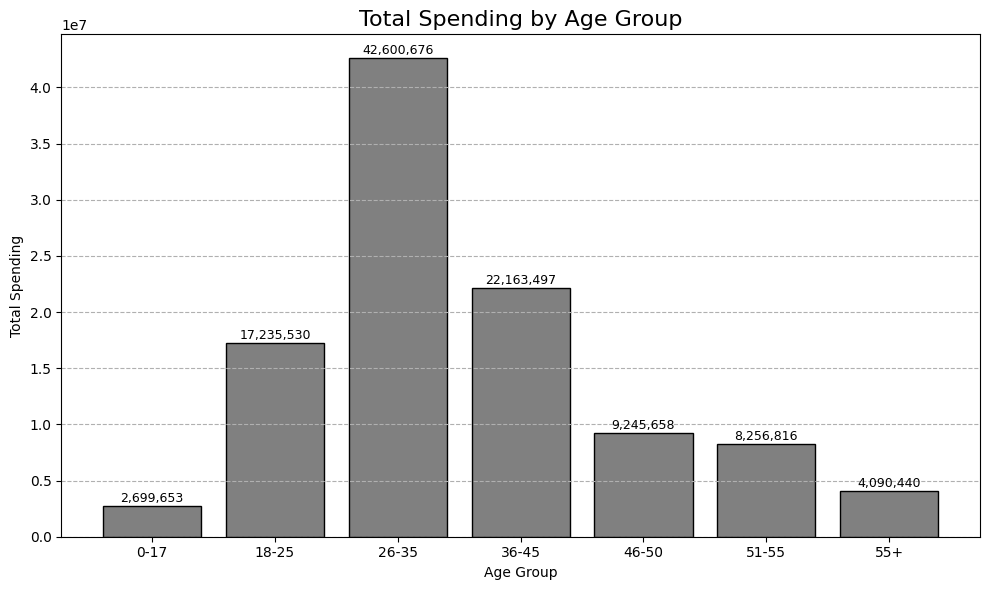

In [157]:
plt.figure(figsize=(10, 6))
bars = plt.bar(temp.keys(), temp.values(), color='grey', edgecolor='black')
plt.title('Total Spending by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Spending')

# Add text on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e5, f'{int(yval):,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [158]:
df.Amount.isnull().sum()

df.Amount.fillna(df.Amount.mean(),inplace = True)

C:\Users\H.P\AppData\Local\Temp\ipykernel_44172\2108247866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Amount.fillna(df.Amount.mean(),inplace = True)


In [159]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Status              0
dtype: int64

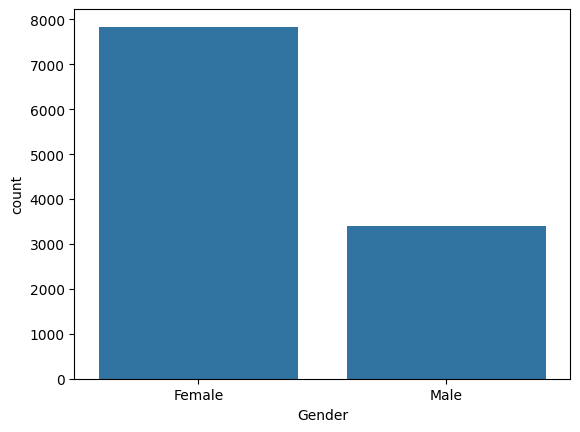

In [160]:
sns.countplot(x="Gender",data = df)
plt.xticks([0,1],["Female","Male"])
plt.show()

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [161]:
df.loc[df["Marital_Status"]==0,"Status"]="Unmarried"
df.loc[df["Marital_Status"]==1,"Status"]="Married"
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Married


In [162]:
df.Occupation.unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'IT Sector', 'Media', 'Banking',
       'Retail', 'Hospitality', 'Aviation', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [163]:
temp = df.groupby("Occupation")["Amount"].sum().to_dict()
temp

{'Agriculture': 2584999.0,
 'Automobile': 5378049.610857728,
 'Aviation': 12599994.0,
 'Banking': 10789518.171715455,
 'Chemical': 5306889.610857728,
 'Construction': 3589588.0,
 'Food Processing': 4070670.0,
 'Govt': 8517212.0,
 'Healthcare': 13034587.49,
 'Hospitality': 6356540.221715455,
 'IT Sector': 14789130.054288637,
 'Lawyer': 4981665.0,
 'Media': 6295832.99,
 'Retail': 4783170.0,
 'Textile': 3214425.6108577275}

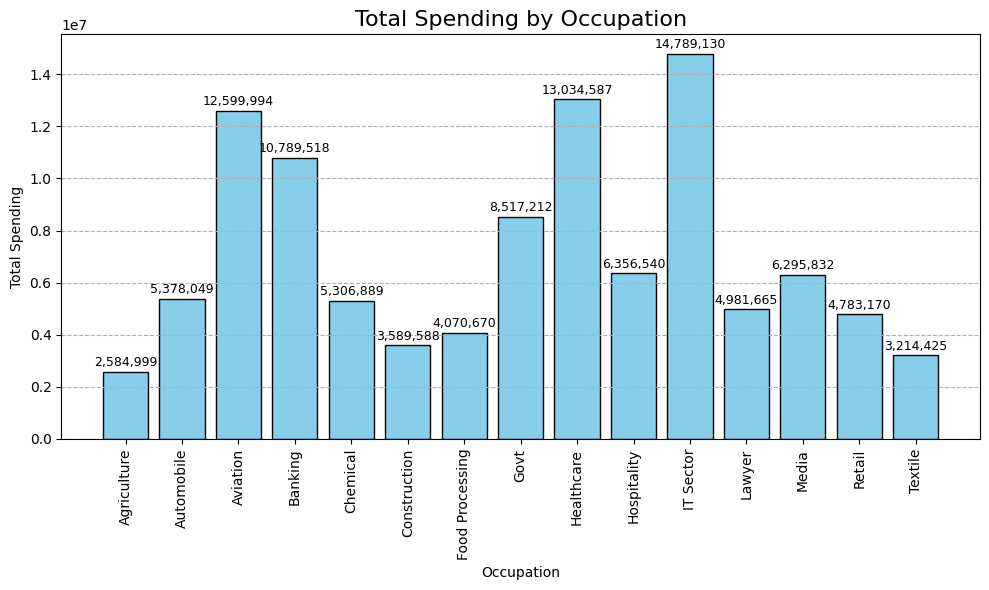

In [164]:
plt.figure(figsize=(10, 6))
bars = plt.bar(temp.keys(), temp.values(), color='skyblue', edgecolor='black')
plt.title('Total Spending by Occupation', fontsize=16)
plt.xlabel('Occupation')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)

# Add text on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e5, f'{int(yval):,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [103]:
df.corr(numeric_only=True)

,User_ID,Age,Marital_Status,Orders,Amount
User_ID,1.000000,0.022630,0.005222,-0.016301,-0.011990
Age,0.022630,1.000000,-0.012253,0.007608,0.030924
Marital_Status,0.005222,-0.012253,1.000000,-0.003690,-0.017483
Orders,-0.016301,0.007608,-0.003690,1.000000,-0.013176
Amount,-0.011990,0.030924,-0.017483,-0.013176,1.000000


In [104]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Married


In [108]:
temp = df.groupby("Product_Category")["Amount"].sum().to_dict()
temp

{'Auto': 1986970.8225731826,
 'Beauty': 1959484.0,
 'Books': 1061478.0,
 'Clothing & Apparel': 16495019.0,
 'Decor': 730360.0,
 'Electronics & Gadgets': 15643846.0,
 'Food': 33962244.33257318,
 'Footwear & Shoes': 15622477.504288638,
 'Furniture': 5449505.600857727,
 'Games & Toys': 4331694.0,
 'Hand & Power Tools': 405618.0,
 'Household items': 1569337.0,
 'Office': 81936.0,
 'Pet Care': 482277.0,
 'Sports Products': 3635933.0,
 'Stationery': 1676051.5,
 'Tupperware': 1155642.0,
 'Veterinary': 112702.0}

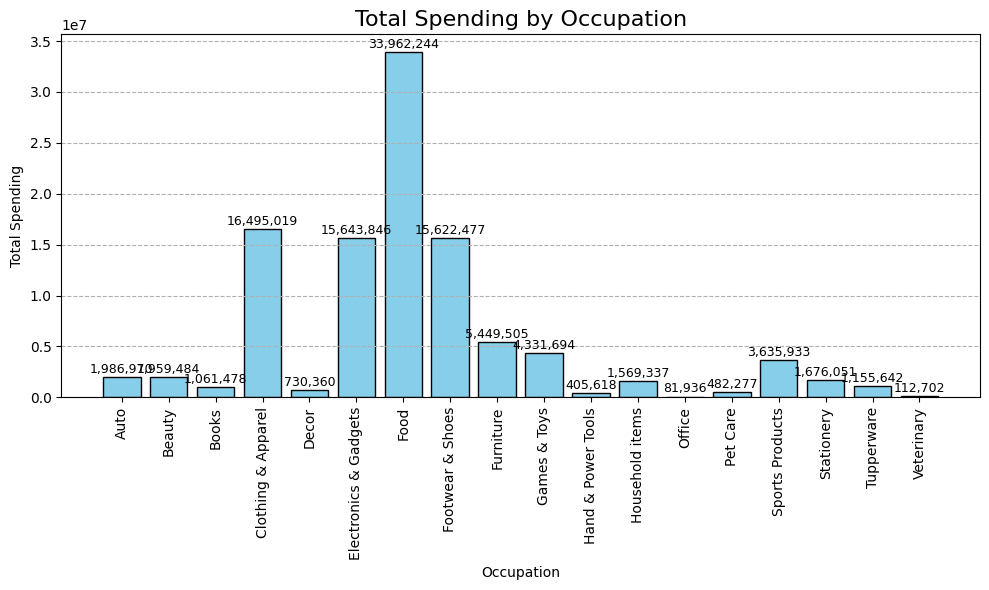

In [109]:
plt.figure(figsize=(10, 6))
bars = plt.bar(temp.keys(), temp.values(), color='skyblue', edgecolor='black')
plt.title('Total Spending by Occupation', fontsize=16)
plt.xlabel('Occupation')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)

# Add text on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e5, f'{int(yval):,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [165]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,Married
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.000000,Married
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.000000,Married
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Unmarried
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.000000,Unmarried
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.990000,Married


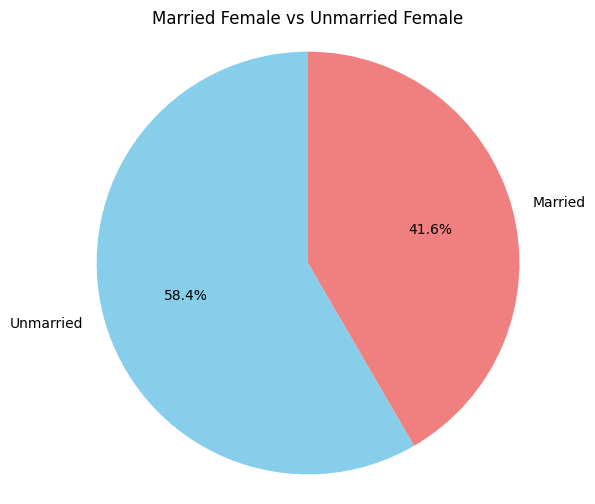

In [166]:
temp=df[df.Gender=="F"]["Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(temp, labels=temp.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Married Female vs Unmarried Female")
plt.axis('equal')  # Makes the pie circular
plt.show()

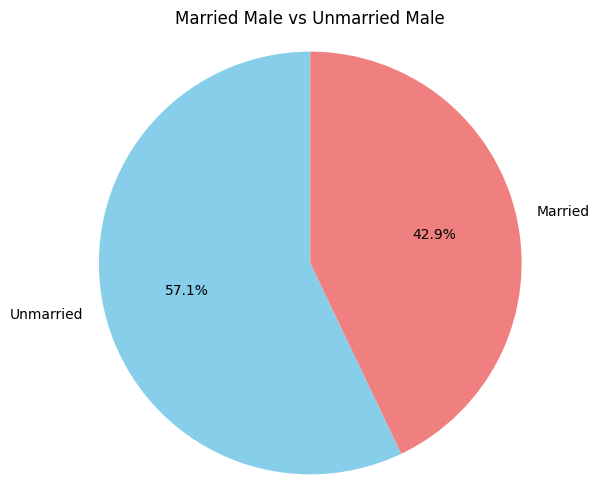

In [123]:
temp =df[df.Gender=="M"]["Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(temp, labels=temp.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Married Male vs Unmarried Male")
plt.axis('equal')  # Makes the pie circular
plt.show()

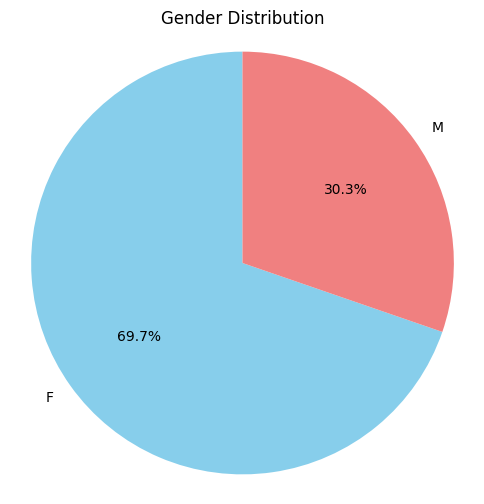

In [167]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Makes the pie circular
plt.show()


In [133]:
df.head(20)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,Married
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.000000,Married
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.000000,Married
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Unmarried
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.000000,Unmarried
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.990000,Married


In [168]:
temp=df.groupby("State")["Amount"].sum().to_dict()

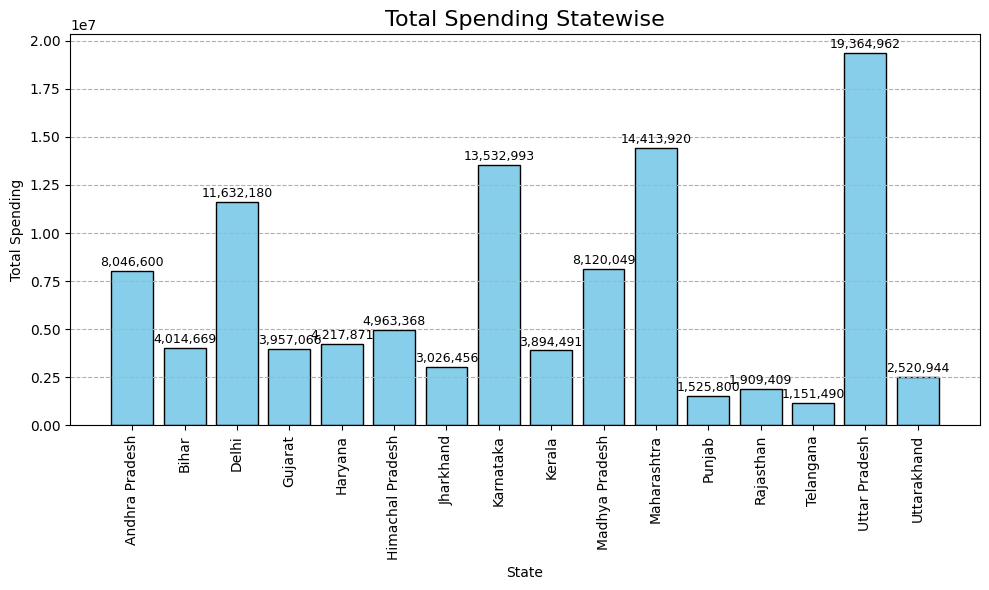

In [169]:
plt.figure(figsize=(10, 6))
bars = plt.bar(temp.keys(), temp.values(), color='skyblue', edgecolor='black')
plt.title('Total Spending Statewise', fontsize=16)
plt.xlabel('State')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)

# Add text on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e5, f'{int(yval):,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [139]:
df.head(20)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,Married
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.000000,Married
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.000000,Married
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Unmarried
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.000000,Unmarried
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.990000,Married


In [172]:
df[(df.Status=="Married")&(df.Gender=="F")].groupby(["Status","Age Group"])["Amount"].sum().to_dict()

{('Married', '0-17'): 516833.0,
 ('Married', '18-25'): 5035051.0,
 ('Married', '26-35'): 12750255.211715454,
 ('Married', '36-45'): 6405879.221715455,
 ('Married', '46-50'): 2882965.832573183,
 ('Married', '51-55'): 2087277.0,
 ('Married', '55+'): 917036.0}

In [173]:
df[(df.Status=="Unmarried")&(df.Gender=="F")].groupby(["Status","Age Group"])["Amount"].sum().to_dict()

{('Unmarried', '0-17'): 924576.0,
 ('Unmarried', '18-25'): 6851952.0,
 ('Unmarried', '26-35'): 18214291.95,
 ('Unmarried', '36-45'): 9122580.100857727,
 ('Unmarried', '46-50'): 3888788.0,
 ('Unmarried', '51-55'): 3307384.6108577275,
 ('Unmarried', '55+'): 1497348.6108577275}

In [142]:
df[(df.Status=="Married")&(df.Gender=="M")].groupby(["Status","Age Group"])["Amount"].sum().to_dict()

{('Married', '0-17'): 527521.0,
 ('Married', '18-25'): 2424064.0,
 ('Married', '26-35'): 4863119.0,
 ('Married', '36-45'): 2877762.0,
 ('Married', '46-50'): 890137.6108577276,
 ('Married', '51-55'): 1289435.0,
 ('Married', '55+'): 711953.0}

In [174]:
df[(df.Status=="Unmarried")&(df.Gender=="M")].groupby(["Status","Age Group"])["Amount"].sum().to_dict()

{('Unmarried', '0-17'): 730723.0,
 ('Unmarried', '18-25'): 2924463.0,
 ('Unmarried', '26-35'): 6773010.0,
 ('Unmarried', '36-45'): 3757276.0,
 ('Unmarried', '46-50'): 1583767.0,
 ('Unmarried', '51-55'): 1596287.6108577275,
 ('Unmarried', '55+'): 964103.0}

In [176]:
df.groupby(["Age Group","Orders"])["Orders"].count()

Age Group  Orders
0-17       1           91
           2           73
           3           75
           4           57
18-25      1          471
           2          496
           3          461
           4          450
26-35      1         1109
           2         1148
           3         1148
           4         1133
36-45      1          560
           2          609
           3          549
           4          567
46-50      1          284
           2          250
           3          217
           4          236
51-55      1          187
           2          223
           3          202
           4          219
55+        1          110
           2           96
           3          113
           4          109
Name: Orders, dtype: int64